# Question 1

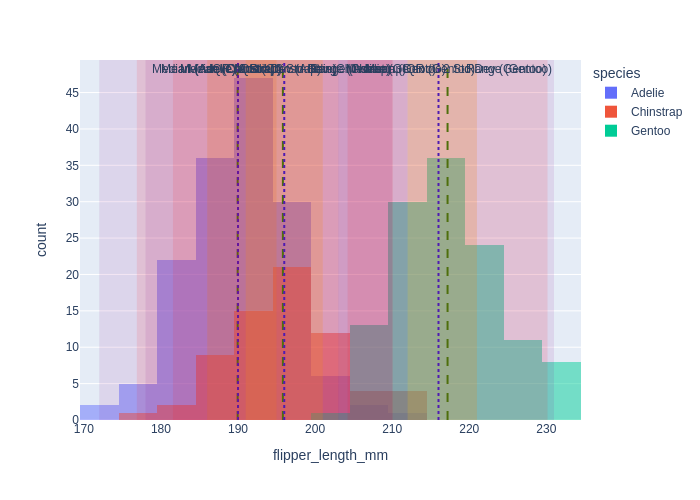

In [29]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins_df = pd.read_csv(url)

# Filtering out null values in flipper_length_mm
penguins_df = penguins_df.dropna(subset=['flipper_length_mm'])

# Create a histogram of flipper_length_mm by species
fig = px.histogram(penguins_df, x='flipper_length_mm', color='species', barmode='overlay')

# Adding statistical annotations for each species
for species in penguins_df['species'].unique():
    subset = penguins_df[penguins_df['species'] == species]
    
    # Calculate statistics
    mean = subset['flipper_length_mm'].mean()
    median = subset['flipper_length_mm'].median()
    std_dev = subset['flipper_length_mm'].std()
    iqr = subset['flipper_length_mm'].quantile(0.75) - subset['flipper_length_mm'].quantile(0.25)
    lower_quartile = subset['flipper_length_mm'].quantile(0.25)
    upper_quartile = subset['flipper_length_mm'].quantile(0.75)
    min_value = subset['flipper_length_mm'].min()
    max_value = subset['flipper_length_mm'].max()
    
    # Add mean line
    fig.add_vline(x=mean, line_width=2, line_dash="dash", line_color="green",
                  annotation_text=f"Mean ({species})", annotation_position="top left")
    
    # Add median line
    fig.add_vline(x=median, line_width=2, line_dash="dot", line_color="blue",
                  annotation_text=f"Median ({species})", annotation_position="top left")
    
    # Add IQR rectangle (interquartile range)
    fig.add_vrect(x0=lower_quartile, x1=upper_quartile, fillcolor="orange", opacity=0.2, 
                  line_width=0, annotation_text=f"IQR ({species})")
    
    # Add range rectangle (min to max)
    fig.add_vrect(x0=min_value, x1=max_value, fillcolor="purple", opacity=0.1, line_width=0,
                  annotation_text=f"Range ({species})")
    
    # Add two standard deviations from the mean rectangle
    fig.add_vrect(x0=mean - 2 * std_dev, x1=mean + 2 * std_dev, fillcolor="red", opacity=0.1, 
                  line_width=0, annotation_text=f"2 Std Dev ({species})")

# Show the figure
fig.show(renderer="png")


Summary: 
Dataset Link: You shared a link to the penguins dataset from Seaborn's repository and requested analysis.

Plotly Histograms: You asked how to use fig.add_vline(), fig.add_hline(), fig.add_vrect(), and fig.add_hrect() in Plotly to mark specific statistics (mean, median, range, interquartile range, and two standard deviations from the mean) on histograms of flipper_length_mm for each species.

Plotly Code Explanation: I provided a code example using Plotly histograms to show how to add these statistical markers:
Vertical Lines (add_vline) for the mean and median.
Shaded Rectangles (add_vrect) for range, IQR, and 2 standard deviations.

add_hline() and add_hrect() Use Case: You asked what the horizontal versions (add_hline() and add_hrect()) could be used for. I explained that they are used for marking horizontal lines and regions on the y-axis, which would be useful in plots like scatter or line charts, but not directly applicable in histograms.

# Question 2

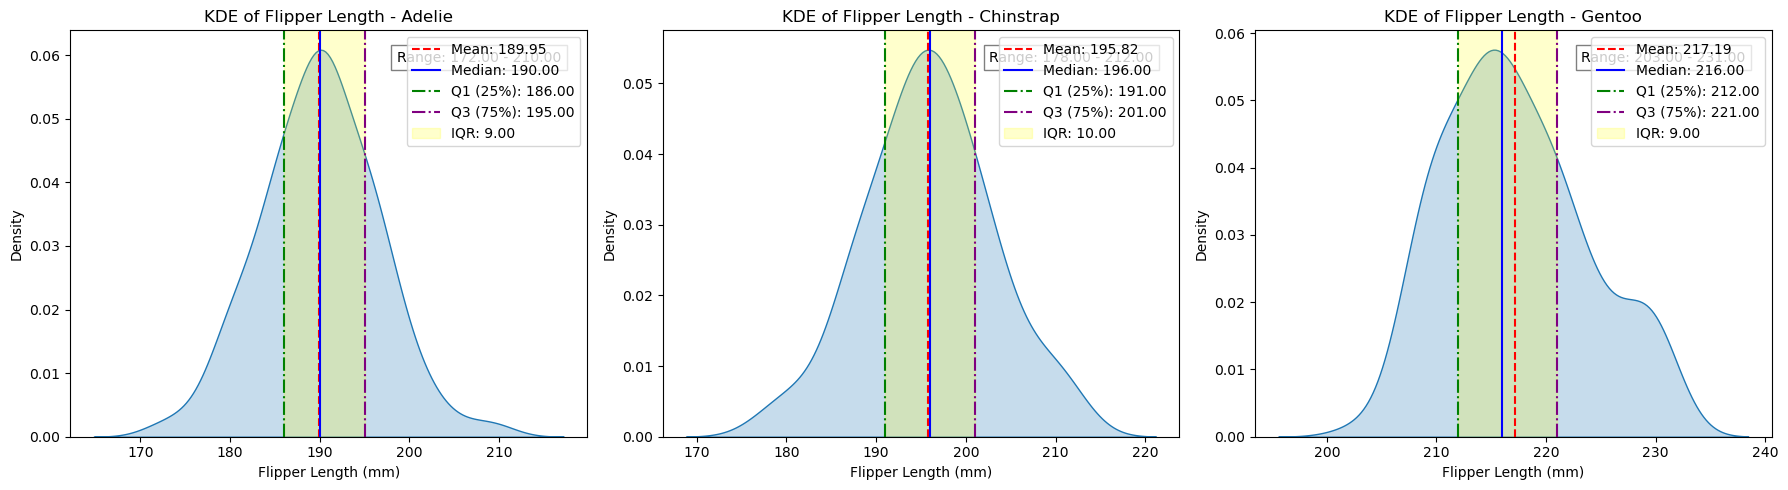

<Figure size 640x480 with 0 Axes>

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
data = sns.load_dataset("penguins")

# Create subplots (3 KDE plots in a single row)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Unique species in the dataset
species = data['species'].dropna().unique()

# Plot KDE for each species and annotate statistics
for i, spec in enumerate(species):
    # Filter data by species
    species_data = data[data['species'] == spec]['flipper_length_mm'].dropna()
    
    # Plot KDE
    sns.kdeplot(species_data, ax=axes[i], fill=True)
    
    # Calculate mean, median, and quartiles
    mean_val = species_data.mean()
    median_val = species_data.median()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    iqr = q3 - q1
    range_val = (species_data.min(), species_data.max())
    
    # Add vertical lines for mean, median, and quartiles
    axes[i].axvline(mean_val, color='red', linestyle='--', label=f"Mean: {mean_val:.2f}")
    axes[i].axvline(median_val, color='blue', linestyle='-', label=f"Median: {median_val:.2f}")
    axes[i].axvline(q1, color='green', linestyle='-.', label=f"Q1 (25%): {q1:.2f}")
    axes[i].axvline(q3, color='purple', linestyle='-.', label=f"Q3 (75%): {q3:.2f}")
    
    # Add shaded box for the interquartile range (IQR)
    axes[i].axvspan(q1, q3, color='yellow', alpha=0.2, label=f"IQR: {iqr:.2f}")
    
    # Annotate the range
    range_text = f"Range: {range_val[0]:.2f} - {range_val[1]:.2f}"
    axes[i].text(0.95, 0.95, range_text, transform=axes[i].transAxes,
                 verticalalignment='top', horizontalalignment='right',
                 bbox=dict(facecolor='white', alpha=0.5))

    # Set titles and labels
    axes[i].set_title(f"KDE of Flipper Length - {spec}")
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].set_ylabel('Density')
    
    # Add legend for all annotations
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()
plt.savefig('kde_flipper_length_species_separate.png', format='png')

Summary: 
Initial Inquiry: You requested assistance with transitioning a previous problem to create Kernel Density Estimation (KDE) plots using Seaborn, specifically focusing on flipper length by species in the penguins dataset.

KDE Plot Creation: I provided a code snippet that generates KDE plots for flipper_length_mm grouped by species, arranging them in a row of three plots. The plots included statistical annotations for mean, median, and range.

Enhancements: After you mentioned wanting to add a legend and boxes showing quartile ranges, I updated the code to include:

Vertical lines for the mean, median, and quartiles (Q1 and Q3).
A shaded area representing the interquartile range (IQR).
A legend describing all the added elements.
Clarification on Density: You clarified the distinction between "density" and "frequency," which I explained in the context of KDE versus histograms.

Title Update: Finally, you requested to ensure the species names were included in the plot titles, which I confirmed was already part of the code but made explicit.

# Link for questions 1 + 2: https://chatgpt.com/share/66ef2993-7678-800d-a4eb-a87adec217da

# Link for more question 2: https://chatgpt.com/share/66f5908e-c7f0-800d-b07e-273f1519c2d3

# Question 3

Between box plots, KDEs, and histograms my preference is histograms. I prefer histograms because they give a visual of the spread and shape of the data with amount of detail between the box plots(not enough), and KDEs(too much if not used properly). I like that you can see the flow of data and its general shape and that this can be changed based on the number of bins you want. The number of bins can be changed to make sure that the data is shown in a way so that data points wont be smoothed over but also with not too much detail so that the overall shape is lost. The number of bins can also be used to emphasize certain aspects of the data. Histograms can also be improved by using fig.add[h/v]line()_ and fig.add[h/v]rect()_ so that the important mathematical ranges and points can be identified. This won't be exact mathmatically, but for my purposes currently I think losing some accuracy with the matheatical points is ok to get a graph that can help me visualize the data better. I recognize that histograms aren't great for comparing a lot of graphs at the same time, but when the graphs are kept seperately I think comparision can be done well by looking at the general shapes of the graphs and the differences in height, skew, or peaks. It might be less efficient than comparing the box plots but I prefer histograms enough to spend more time comparing them.

Summary:
Initial Discussion: You shared your thoughts on three types of plots: box plots, kernel density estimators (KDE), and histograms. You pointed out that box plots show key percentiles and spread well but don't fully represent the data's distribution. You felt that KDEs provide a clearer view of data density with a smooth curve, and histograms offer a middle ground—visualizing distribution better than box plots but still less smoothly than KDEs.

My Response: I agreed with your assessments and elaborated on the strengths and weaknesses of each graph type. We discussed how box plots excel at summarizing data, KDEs at showing the distribution’s shape, and histograms at representing frequencies with clarity.

Further Discussion: You asked for my personal opinion, and I added nuances—mentioning the importance of bandwidth for KDEs, the flexibility of histograms with bin width, and how box plots, while useful for comparisons, can abstract away key details.

Pros and Cons: You asked for a more structured view, so I provided detailed pros and cons lists for each plot type. We explored their advantages and disadvantages in terms of visualization, ease of use, and specific scenarios where each is most effective.

# Link for 3: https://chatgpt.com/share/66ef29d2-7cf0-800d-8023-55daa90d1cac

# Question 4

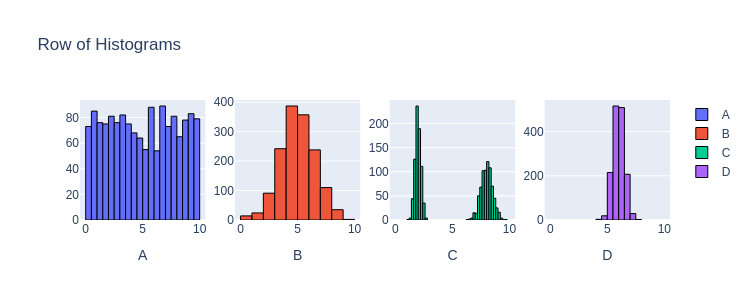

In [35]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. Graphs A and C have similar means and variances
2. Graphs B and C and A and B have similar means but different variances
3. Graphs B and D have similar variances but different means
4. Graphs C and D and A and D have different means and variances 

Summary:
Random Data Histogram: You requested a random example of data, so I generated a histogram of normally distributed data with a mean of 49.84 and a variance of 222.43. We discussed how the histogram shows a bell-shaped curve, typical of normal distributions, and how variance measures the spread of the data.

Variance Explanation: I explained that variance measures the spread of data around the mean. A small variance indicates data points are close to the mean, while a large variance shows that data points are spread out. You can estimate the variance by looking at the width of the data distribution on the graph.

Bimodal Distribution: We discussed how a histogram with two peaks (a bimodal distribution) affects the mean and variance. The mean typically lies between the two peaks, and the variance is larger than in unimodal distributions, reflecting the data's wider spread.

Uniform Distribution Histogram: You asked about a histogram where all the bins are the same height, representing a uniform distribution. The mean is at the center of the distribution, and the variance is determined by the spread between the minimum and maximum values.

Visual Example of Uniform Distribution: I generated a histogram for a uniform distribution, where the mean was approximately 30 and the variance was 130.14, showing how the data was evenly spread between 10 and 50.

# https://chatgpt.com/share/66f1f900-a604-800d-83f9-4cb6d89a5bd8 

# Question 5

The relationship between the mean and the median and which way a graph is skewed is how the skew affects the mean and then if the affected mean is bigger or smaller than the median. When a graph is skewed to the right the mean is going to be skewed towards higher values making the mean bigger than the median. When a graph is skewed left the mean is going to be skewed towards the lower values making it smaller than the median.

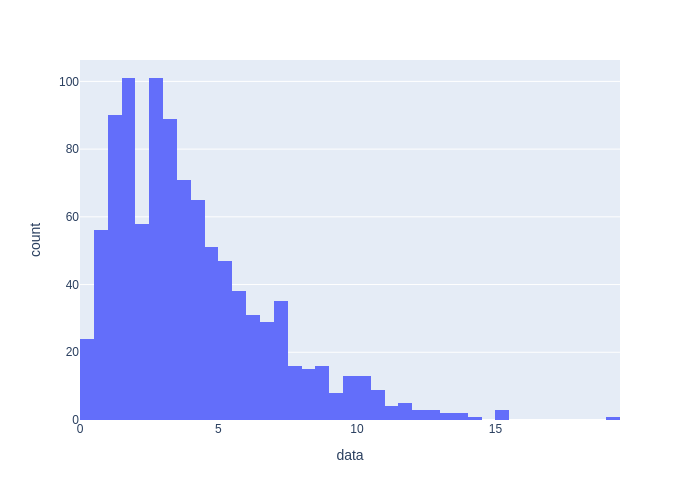

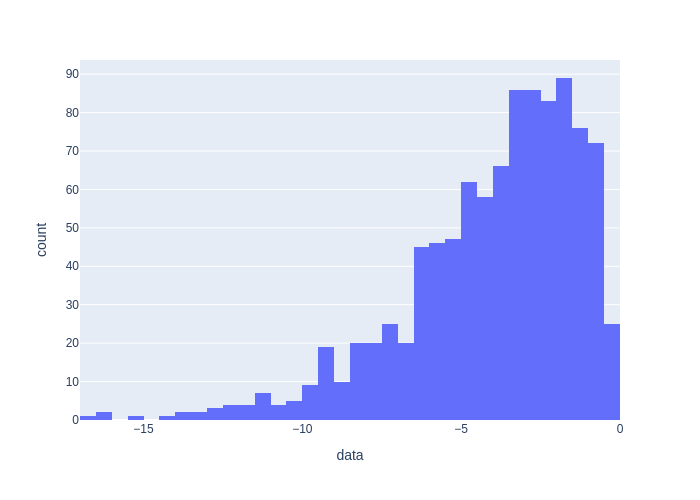

In [8]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS
fig1.show(renderer="png")

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")
fig2.show(renderer="png")

Looking at the first graph you can see that the data extends out to the right. This means that the mean will be shifted towards the right to compensate for these other points. The mean will be bigger than the median since the median will be at the middle value which will be somewhere in the bigger mound of data on the left. It is the same for the lower graph except since it skews left the mean will be smaller than the median which will be with the higher values on the right.

Summary:
Skewness and Measures of Central Tendency:
You asked about the relationship between the mean, median, and distribution skewness (right-skewed vs. left-skewed).
I explained how in a right-skewed distribution, the mean is greater than the median, and in a left-skewed distribution, the mean is less than the median.
Differences Between Mean, Median, and Mode:
You asked for the differences between mean, median, and mode.
I explained that:
The mean is the arithmetic average.
The median is the middle value in an ordered dataset.
The mode is the most frequent value.
I also highlighted how each is affected by outliers and when they are best used.
Python Code Using SciPy and Plotly:
You shared Python code using scipy.stats to generate Gamma-distributed data and asked if it would generate a visual.
I provided a complete code example with the missing import for plotly.express and the appropriate show() command to generate and display histograms of right-skewed and left-skewed data.
Impact of Data Distribution on Mean and Median:
You asked if, in a distribution where most data is on the left but there are small amounts extending far to the right, the mean would still be larger than the median.
I confirmed that in this case, the mean will generally be larger than the median due to the influence of the extreme values on the right.


# Question 5 link: https://chatgpt.com/share/66f1ba87-18ac-800d-8cd5-bc6876691b6e

# Question 6

In [15]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-08-27/power_rangers_episodes.csv")
df

,season_title,episode_num,episode_title,air_date,IMDB_rating,total_votes,desc
0,Mighty Morphin (Season 1),0,The Lost Episode,1999-05-22,6.7,113,Original version of the premiere episode.
1,Mighty Morphin (Season 1),1,Day of the Dumpster,1993-08-28,7.4,687,Following the accidental release of long-impri...
2,Mighty Morphin (Season 1),2,High Five,1993-09-04,6.9,564,Rita plans to trap the Rangers in a time trap ...
3,Mighty Morphin (Season 1),3,Teamwork,1993-09-08,7.3,546,Trini and Kimberly set up a petition to clean ...
4,Mighty Morphin (Season 1),4,A Pressing Engagement,1993-09-09,6.9,535,Jason is trying to break the bench press recor...
...,...,...,...,...,...,...,...
916,Beast Morphers (Season 2),18,Crunch Time,2020-11-28,9.1,21,"Devon falls victim to a bad influence, which a..."
917,Beast Morphers (Season 2),19,Source Code,2020-12-05,9.7,30,Nate makes a horrifying discovery and must rel...
918,Beast Morphers (Season 2),20,Evox Unleashed,2020-12-12,9.4,30,"Evox finally executes his master plan, and the..."
919,Beast Morphers (Season 2),21,Boxed In,2020-04-18,8.1,27,The Pan Global Games have arrived in Coral Har...


In [16]:
df.shape

(921, 7)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season_title   921 non-null    object 
 1   episode_num    921 non-null    int64  
 2   episode_title  921 non-null    object 
 3   air_date       921 non-null    object 
 4   IMDB_rating    921 non-null    float64
 5   total_votes    921 non-null    int64  
 6   desc           921 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 50.5+ KB


In [18]:
df.describe()

,episode_num,IMDB_rating,total_votes
count,921.000000,921.000000,921.000000
mean,19.298588,7.450054,155.446254
std,12.639521,0.804554,155.395175
min,0.000000,4.500000,19.000000
25%,9.000000,6.900000,40.000000
50%,18.000000,7.400000,55.000000
75%,28.000000,8.000000,272.000000
max,60.000000,9.700000,687.000000


/tmp/ipykernel_53/316442799.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




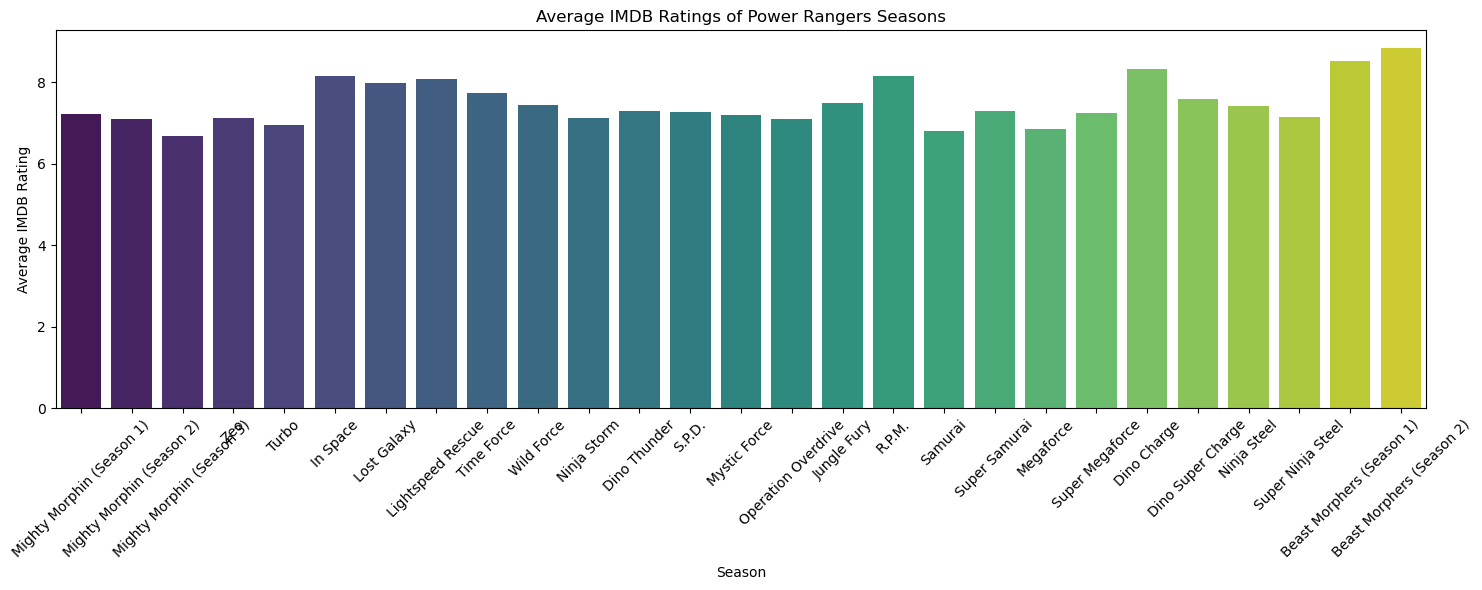

<Figure size 640x480 with 0 Axes>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-08-27/power_rangers_episodes.csv'
data = pd.read_csv(url)

# Remove rows with missing IMDB ratings if any
data = data.dropna(subset=['IMDB_rating'])

# Calculate the average rating for each season
season_avg_rating = data.groupby('season_title')['IMDB_rating'].mean().reset_index()

# Get the unique season titles in release order as they appear in the dataset
release_order = data['season_title'].unique()

# Convert 'season_title' to a categorical type with the specified release order
season_avg_rating['season_title'] = pd.Categorical(season_avg_rating['season_title'], categories=release_order, ordered=True)

# Sort by the release order
season_avg_rating = season_avg_rating.sort_values(by='season_title')

# Create a bar plot to compare average ratings of each season
plt.figure(figsize=(15, 6))
bar_plot = sns.barplot(x='season_title', y='IMDB_rating', data=season_avg_rating, palette='viridis', dodge=False)

# Move the x-tick labels to the left
for label in bar_plot.get_xticklabels():
    label.set_x(label.get_position()[0] - 0.15)  # Adjust the x position to move left

plt.title('Average IMDB Ratings of Power Rangers Seasons')
plt.xlabel('Season')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)
plt.tight_layout()  # Ensure everything fits
plt.show()
plt.savefig('average_rating_seasons.png', format='png')

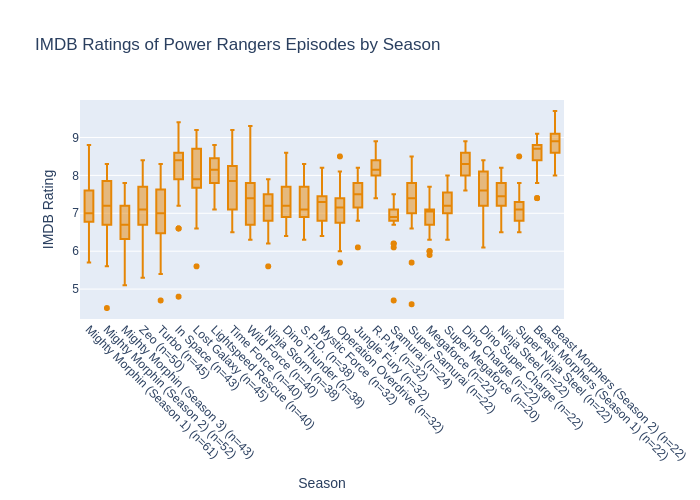

In [1]:
import pandas as pd
import plotly.express as px

# Load the dataset
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-08-27/power_rangers_episodes.csv'
data = pd.read_csv(url)

# Remove rows with missing IMDB ratings if any
data = data.dropna(subset=['IMDB_rating'])

# Count the number of episodes per season
episodes_per_season = data.groupby('season_title')['episode_num'].count().reset_index()

# Ensure the seasons are sorted by their original order
release_order = data['season_title'].unique()
data['season_title'] = pd.Categorical(data['season_title'], categories=release_order, ordered=True)

# Create a box plot to compare IMDB ratings of episodes within each season
fig = px.box(data, x='season_title', y='IMDB_rating',
              title='IMDB Ratings of Power Rangers Episodes by Season',
              labels={'season_title': 'Season', 'IMDB_rating': 'IMDB Rating'},
              color_discrete_sequence=px.colors.qualitative.Vivid)

# Update the x-axis labels to include sample sizes inline with the season titles
season_counts = episodes_per_season.set_index('season_title')['episode_num'].to_dict()
new_x_labels = [f"{season} (n={season_counts[season]})" for season in release_order]

# Update layout to remove the legend and set custom x-axis labels
fig.update_layout(
    xaxis_title='Season',
    yaxis_title='IMDB Rating',
    xaxis=dict(tickvals=release_order, ticktext=new_x_labels, tickangle=45),  # Set new tick labels in the correct order
    showlegend=False  # Remove the legend
)

# Show the figure
fig.show(renderer="png")



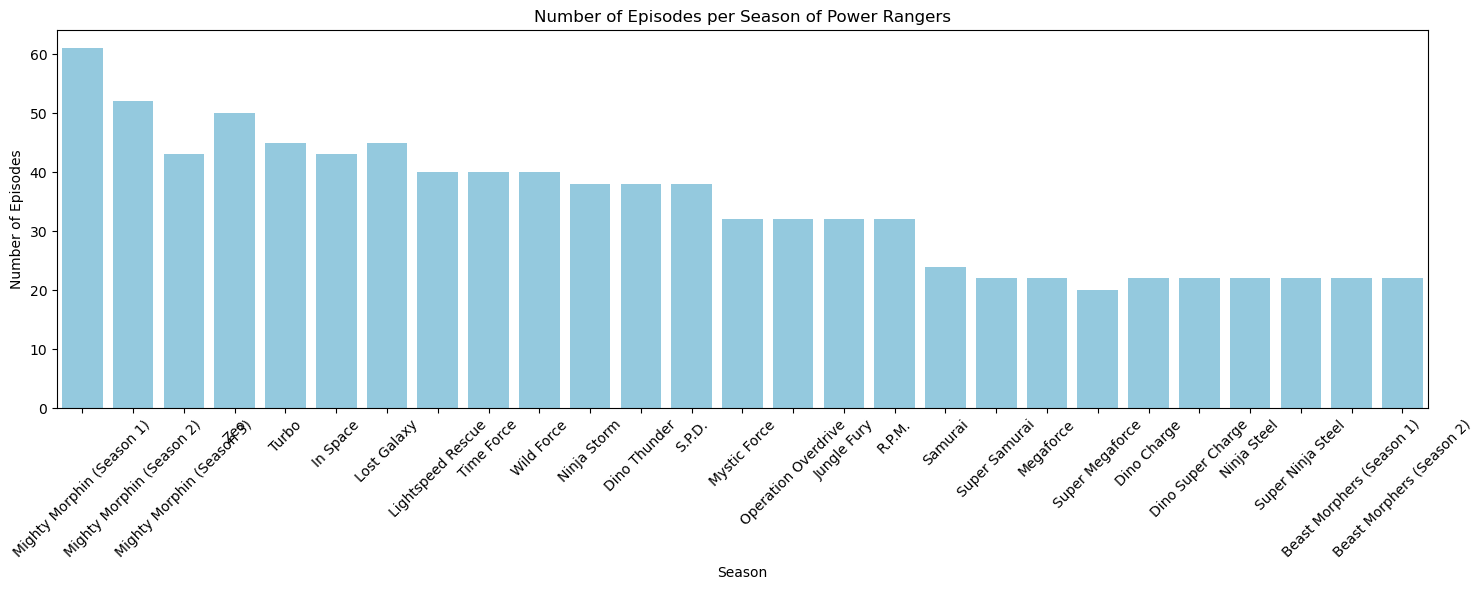

<Figure size 640x480 with 0 Axes>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-08-27/power_rangers_episodes.csv'
data = pd.read_csv(url)

# Count the number of episodes per season
episodes_per_season = data.groupby('season_title')['episode_num'].count().reset_index()

# Sort the seasons by their original order in the dataset
release_order = data['season_title'].unique()
episodes_per_season['season_title'] = pd.Categorical(episodes_per_season['season_title'], categories=release_order, ordered=True)
episodes_per_season = episodes_per_season.sort_values(by='season_title')

# Create a bar plot to compare the number of episodes per season
plt.figure(figsize=(15, 6))
sns.barplot(x='season_title', y='episode_num', data=episodes_per_season, color='skyblue', errorbar=None)
plt.title('Number of Episodes per Season of Power Rangers')
plt.xlabel('Season')
plt.ylabel('Number of Episodes')
plt.xticks(rotation=45)
plt.tight_layout()  # Ensure everything fits
plt.show()
plt.savefig('episodes_per_season.png', format='png')


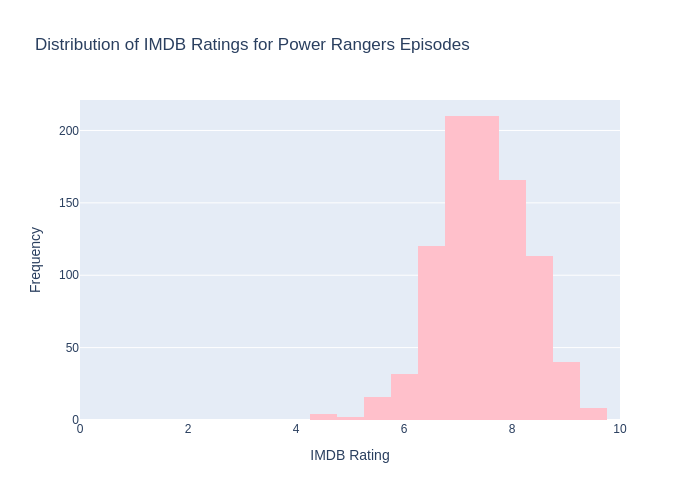

In [38]:
import pandas as pd
import plotly.express as px

# Load the dataset
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-08-27/power_rangers_episodes.csv'
data = pd.read_csv(url)

# Remove rows with missing IMDB ratings if any
data = data.dropna(subset=['IMDB_rating'])

# Create a histogram of IMDB ratings
fig = px.histogram(data, x='IMDB_rating', nbins=15, 
                   title='Distribution of IMDB Ratings for Power Rangers Episodes',
                   labels={'IMDB_rating': 'IMDB Rating'},
                   color_discrete_sequence=['pink'])

# Update layout for better visualization
fig.update_layout(
    xaxis_title='IMDB Rating',
    yaxis_title='Frequency',
    xaxis=dict(range=[0, 10])  # Set the x-axis limits based on typical IMDB rating ranges
)

# Show the figure
fig.show(renderer="png")



Summary:
Initial Request: You asked for guidance on creating a histogram comparing episodes versus their IMDB ratings using a provided dataset.

Filtering for Season One: After generating the histogram, you requested modifications to focus only on season one and update column titles from "Rating" to "IMDB_rating" and "Number of Episodes" to "episode_num."

X-axis Adjustments: You asked for the x-axis to show episodes instead of seasons and for the rating on the y-axis. After implementing this, you found the x-axis range too small, making episode labels hard to read.

Change of Focus: You then changed your request to calculate average ratings per season and visualize those averages with a histogram, specifying that seasons should be arranged by release order.

Visual Adjustments: The histogram was successfully created, but you found the x-axis titles slightly off, leading to attempts to adjust their positioning.

Count of Episodes per Season: You then requested a bar plot showing the number of episodes per season without hues. This was accomplished, but with warnings about deprecated parameters.

Histogram of IMDB Ratings: You shifted focus back to a histogram of IMDB ratings, asking to use Plotly for the visualization.

Box Plots for Episode Ratings by Season: You asked for box plots to compare episode ratings within each season. The plot was created, and you requested the removal of the legend and to include sample sizes alongside season titles.

Final Adjustments: You wanted the sample sizes inline with the titles rather than on a new row to avoid overlap. This adjustment was made, resulting in a clean and informative box plot.

Outcome: By the end of our interaction, you successfully created an interactive box plot that displayed the IMDB ratings of Power Rangers episodes by season, with inline sample sizes for clarity.

Conclusion: You expressed satisfaction with the results, and I offered further assistance if needed.

# Question 6 link: https://chatgpt.com/share/66f35ba4-bcbc-800d-8175-244e86930e7a

# Question 7

In [5]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])


# Question 8

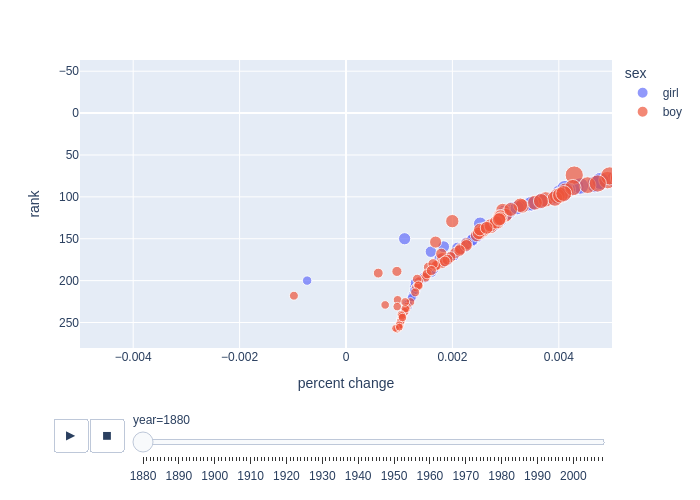

In [39]:
import pandas as pd
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

# Question 9
yes